Применять среду Coursera 

In [ ]:
import pandas as pd

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову:
Загрузите ряд, например, так:
и постройте его график. Какой из приведённых ниже графиков у вас получился?

In [5]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

C:\Users\Timofey\anaconda3\envs\coursera\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
milk

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [7]:
import matplotlib.pyplot as plt

In [106]:
y = milk['milk']
x = range(0,168,1)

In [104]:
y

month
1962-01-01    589
1962-02-01    561
1962-03-01    640
1962-04-01    656
1962-05-01    727
             ... 
1975-08-01    858
1975-09-01    817
1975-10-01    827
1975-11-01    797
1975-12-01    843
Name: milk, Length: 168, dtype: int64

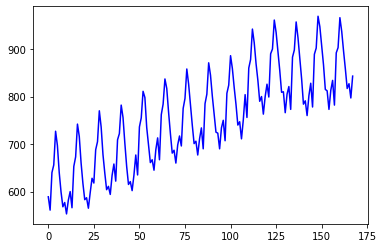

In [19]:
plt.plot(x,y,color='b')

Вопрос 4
Примените к ряду из предыдущего вопроса критерий Дики-Фуллера. Это делается так:


conda install -c anaconda statsmodels
https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html


In [21]:
import statsmodels.api as sm


Чему равен полученный достигаемый уровень значимости? Округлите до двух знаков после десятичной точки.

In [23]:
sm.tsa.stattools.adfuller(y)  # !второй! параметр показывает достигаемый уровень значимости 

(-1.3038115874221312,
 0.6274267086030308,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

## Ответ  0.63

#### Вопрос 5
Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [81]:
milk.index[1].date().strftime('%Y-%m-%d') # !!!!!!!!  такая функция позволяет получить дату в нужном формате 

'1962-02-01'

In [116]:
milk.loc[milk.index[0]]['milk'] # получаем значение по индексу 

589

Получим число дней в каждом месяце 

In [120]:
old_p = 0 
date_array = []
p_array = []

for i in milk.index:
    #print (i.date())
    date_array.append(i)
    p = pd.Period(i.date().strftime('%Y-%m-%d')).days_in_month
    p_array.append(p)
    
    print ('{}   ---   {} '.format( i , p))
    

1962-01-01 00:00:00   ---   31 
1962-02-01 00:00:00   ---   28 
1962-03-01 00:00:00   ---   31 
1962-04-01 00:00:00   ---   30 
1962-05-01 00:00:00   ---   31 
1962-06-01 00:00:00   ---   30 
1962-07-01 00:00:00   ---   31 
1962-08-01 00:00:00   ---   31 
1962-09-01 00:00:00   ---   30 
1962-10-01 00:00:00   ---   31 
1962-11-01 00:00:00   ---   30 
1962-12-01 00:00:00   ---   31 
1963-01-01 00:00:00   ---   31 
1963-02-01 00:00:00   ---   28 
1963-03-01 00:00:00   ---   31 
1963-04-01 00:00:00   ---   30 
1963-05-01 00:00:00   ---   31 
1963-06-01 00:00:00   ---   30 
1963-07-01 00:00:00   ---   31 
1963-08-01 00:00:00   ---   31 
1963-09-01 00:00:00   ---   30 
1963-10-01 00:00:00   ---   31 
1963-11-01 00:00:00   ---   30 
1963-12-01 00:00:00   ---   31 
1964-01-01 00:00:00   ---   31 
1964-02-01 00:00:00   ---   29 
1964-03-01 00:00:00   ---   31 
1964-04-01 00:00:00   ---   30 
1964-05-01 00:00:00   ---   31 
1964-06-01 00:00:00   ---   30 
1964-07-01 00:00:00   ---   31 
1964-08-

In [96]:
summa = sum (p_array, 0)
summa

5113

In [128]:
new_timeSeries = []
for i in range(0, 168,1):
    new_timeSeries.append((milk.loc[milk.index[i]]['milk'])/p_array[i])

In [129]:
new_timeSeries

[19.0,
 20.035714285714285,
 20.64516129032258,
 21.866666666666667,
 23.451612903225808,
 23.233333333333334,
 20.64516129032258,
 19.322580645161292,
 18.933333333333334,
 18.612903225806452,
 18.433333333333334,
 18.774193548387096,
 19.35483870967742,
 20.214285714285715,
 21.06451612903226,
 22.433333333333334,
 23.93548387096774,
 23.866666666666667,
 21.29032258064516,
 19.903225806451612,
 19.433333333333334,
 18.93548387096774,
 18.833333333333332,
 19.29032258064516,
 20.258064516129032,
 21.310344827586206,
 22.193548387096776,
 23.5,
 24.838709677419356,
 24.533333333333335,
 21.870967741935484,
 20.612903225806452,
 20.133333333333333,
 19.70967741935484,
 19.8,
 20.451612903225808,
 21.225806451612904,
 22.214285714285715,
 22.870967741935484,
 24.066666666666666,
 25.225806451612904,
 25.2,
 22.64516129032258,
 21.06451612903226,
 20.5,
 20.032258064516128,
 20.066666666666666,
 20.483870967741936,
 21.838709677419356,
 22.678571428571427,
 23.741935483870968,
 25.166666

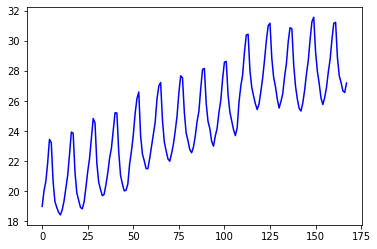

In [131]:
y = new_timeSeries
x = range(0,168,1)
plt.plot(x,y,color='b')

In [133]:
summa_2 = sum(new_timeSeries)
summa_2

4166.326661899464

## Ответ  4166.33

In [29]:
p

31